In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Review of plots: welcome survey ##

In [2]:
survey = Table.read_table('welcome_survey_su19.csv')

In [3]:
survey

Number of Texters
2
4
8
20
2
4
1
4
4
8


Let's examine the distribution of the number of people you text in a day. 

In [4]:
max(survey.column("Number of Texters"))

30

In [5]:
np.average(survey.column("Number of Texters"))

5.507936507936508

In [6]:
np.median(survey.column("Number of Texters"))

5.0

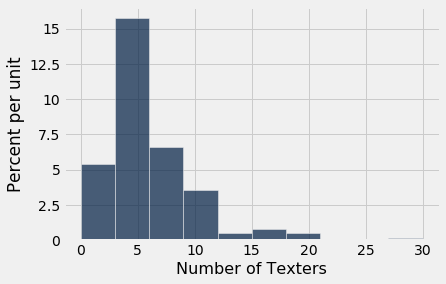

In [7]:
survey.hist("Number of Texters")

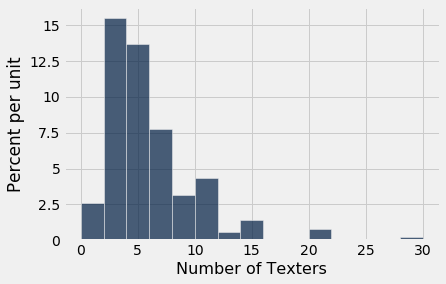

In [8]:
survey.hist("Number of Texters", bins = np.arange(0, 32, 2))

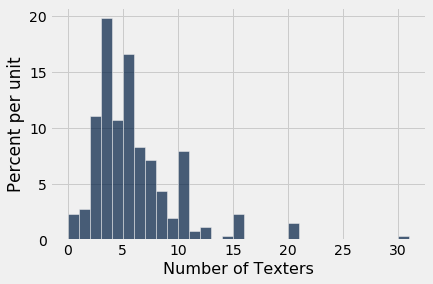

In [9]:
survey.hist("Number of Texters", bins = np.arange(0, 32, 1))

## Histogram review: heights and heredity ##

In [ ]:
galton = Table.read_table('galton.csv')

# Functions

In [19]:
def double(x):
    hello = "world"
    return 2*x

In [11]:
double(3)

6

In [12]:
num = 4
double(num)

8

In [13]:
double(num*5)

40

In [14]:
double('data')

'datadata'

In [17]:
double(np.arange(4))

array([0, 2, 4, 6])

In [18]:
x

NameError: name 'x' is not defined

In [20]:
hello

NameError: name 'hello' is not defined

In [21]:
x = 5
double(x*2)

20

In [22]:
x

5

# Discussion Question

In [23]:
def percent_of_total(arr):
    return np.round(arr/sum(arr)*100, 2)

In [24]:
percent_of_total(make_array(1, 2, 3, 4))

array([10., 20., 30., 40.])

In [26]:
percent_of_total(make_array(1, 239, 182))

array([ 0.24, 56.64, 43.13])

In [27]:
percent_of_total(3)

TypeError: 'int' object is not iterable

## Apply ##

In [28]:
ages = Table().with_columns(
    'Person', make_array('A', 'B', 'C', 'D'),
    'Age', make_array(63, 110, 99, 102)
)
ages

Person,Age
A,63
B,110
C,99
D,102


In [29]:
def cap_at_100(age):
    return min(age, 100)

In [30]:
cap_at_100(43)

43

In [31]:
cap_at_100(110)

100

In [34]:
ages.apply(cap_at_100, "Age")

array([ 63, 100,  99, 100])

In [32]:
type(cap_at_100)

function

In [33]:
type(cap_at_100(109))

int

## Prediction

In [35]:
galton = Table.read_table('galton.csv')

In [36]:
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


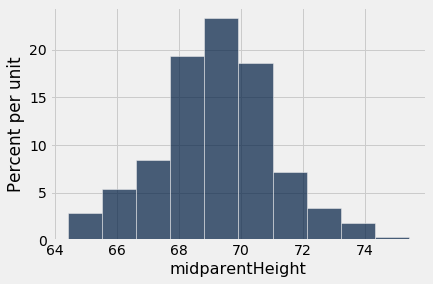

In [37]:
galton.hist("midparentHeight")

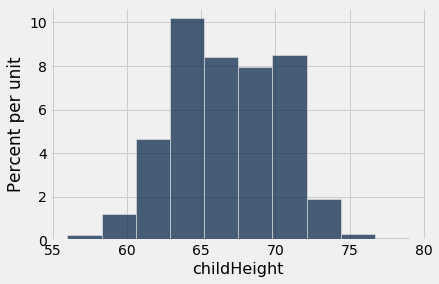

In [38]:
galton.hist("childHeight")

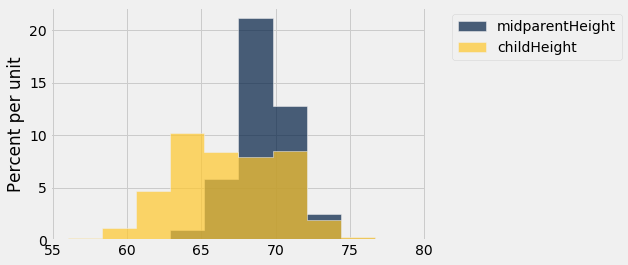

In [39]:
galton.hist("midparentHeight", "childHeight")

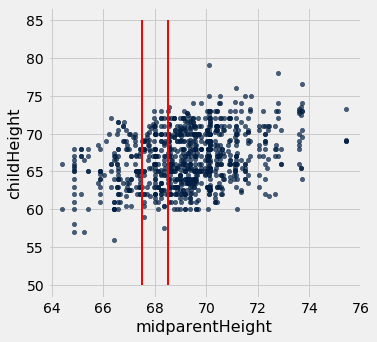

In [40]:
galton.scatter('midparentHeight', 'childHeight')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2);

In [41]:
nearby = galton.where("midparentHeight", are.between(67.5, 68.5))
np.mean(nearby.column("childHeight"))

66.24045801526718

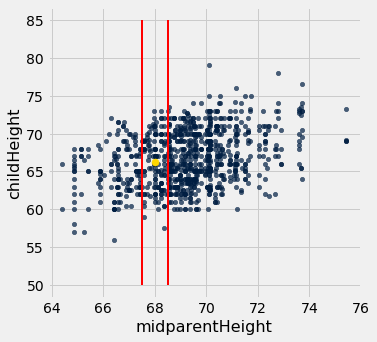

In [42]:
galton.scatter('midparentHeight', 'childHeight')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, 66.24, color='gold', s=50);

In [43]:
def predict(h):
    nearby = galton.where("midparentHeight", are.between(h-0.5, h+0.5))
    return np.mean(nearby.column("childHeight"))

In [44]:
predict(68)

66.24045801526718

In [45]:
predict(70)

67.27285067873302

In [46]:
predicted_heights = galton.apply(predict, "midparentHeight")

In [47]:
galton = galton.with_column("predictedHeight", predicted_heights)

In [48]:
galton.show(5)

family,father,mother,midparentHeight,children,childNum,gender,childHeight,predictedHeight
1,78.5,67,75.43,4,1,male,73.2,70.1
1,78.5,67,75.43,4,2,female,69.2,70.1
1,78.5,67,75.43,4,3,female,69,70.1
1,78.5,67,75.43,4,4,female,69,70.1
2,75.5,66.5,73.66,4,1,male,73.5,70.4158


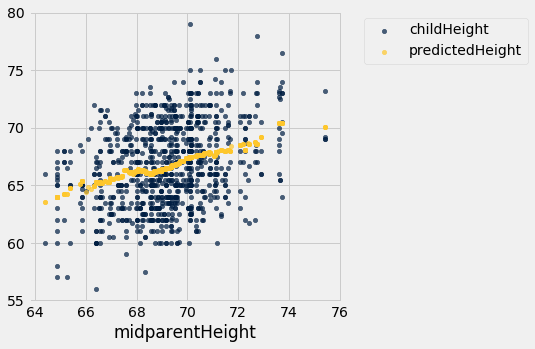

In [49]:
galton.select("midparentHeight", "childHeight", "predictedHeight").scatter("midparentHeight")